In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...


In [3]:
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv'

In [5]:
df = pd.read_csv('Datasets/netflix_titles.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/netflix_titles.csv'

In [6]:
import pandas as pd

# Raw GitHub link for Titanic dataset
url = "https://raw.githubusercontent.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/main/Datasets/netflix_titles.csv"

# Load CSV
df = pd.read_csv(url)

# Quick check
print(df.head())
print(df.info())
print(df.isnull().sum())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [7]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

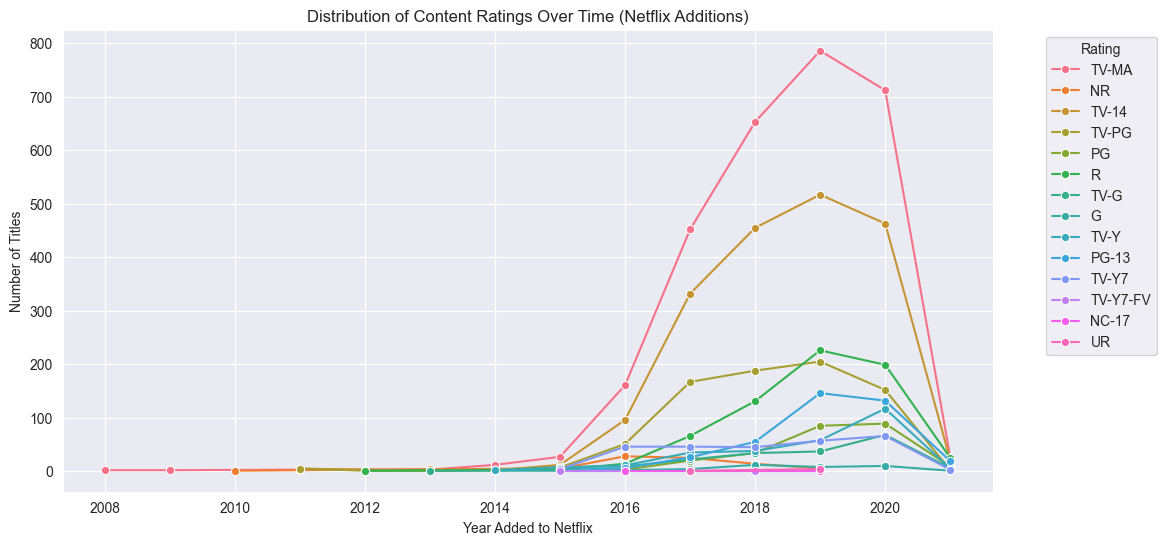

In [ ]:
#How has the distribution of content ratings changed over time?
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the date_added column is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added (since it's when Netflix added the title)
df['year_added'] = df['date_added'].dt.year

# Drop rows with missing years or ratings
rating_trend = df.dropna(subset=['year_added', 'rating'])

# Group by year and rating to count how many titles of each rating were added
rating_year = rating_trend.groupby(['year_added', 'rating']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=rating_year, x='year_added', y='count', hue='rating', marker='o')
plt.title('Distribution of Content Ratings Over Time (Netflix Additions)')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


          count       mean       std  min  25%  50%   75%    max
type                                                            
Movie    5377.0  12.079970  9.663282  4.0  7.0  9.0  13.0   83.0
TV Show  2410.0   8.808299  5.664826  4.0  6.0  7.0  10.0  100.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20608\4224529435.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_age, x='type', y='content_age', palette='Set2')


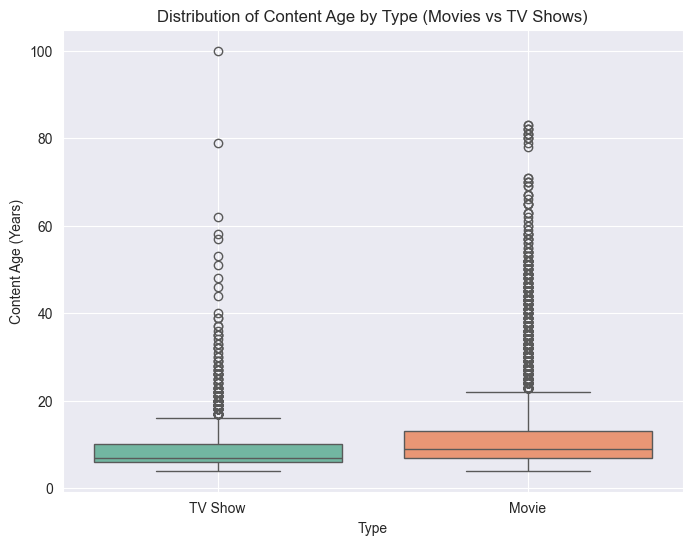


Average Content Age by Type:
 type
Movie      12.079970
TV Show     8.808299
Name: content_age, dtype: float64


In [12]:
#Is there a relationship between content age and its type (Movie vs. TV Show)?
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Drop missing release years or type
df_age = df.dropna(subset=['release_year', 'type']).copy()

# Calculate content age
current_year = datetime.now().year
df_age['content_age'] = current_year - df_age['release_year']

# Basic descriptive stats
print(df_age.groupby('type')['content_age'].describe())

# Boxplot to visualize distribution
plt.figure(figsize=(8,6))
sns.boxplot(data=df_age, x='type', y='content_age', palette='Set2')
plt.title('Distribution of Content Age by Type (Movies vs TV Shows)')
plt.xlabel('Type')
plt.ylabel('Content Age (Years)')
plt.grid(True)
plt.show()

# Optional: mean content age comparison
mean_ages = df_age.groupby('type')['content_age'].mean()
print("\nAverage Content Age by Type:\n", mean_ages)


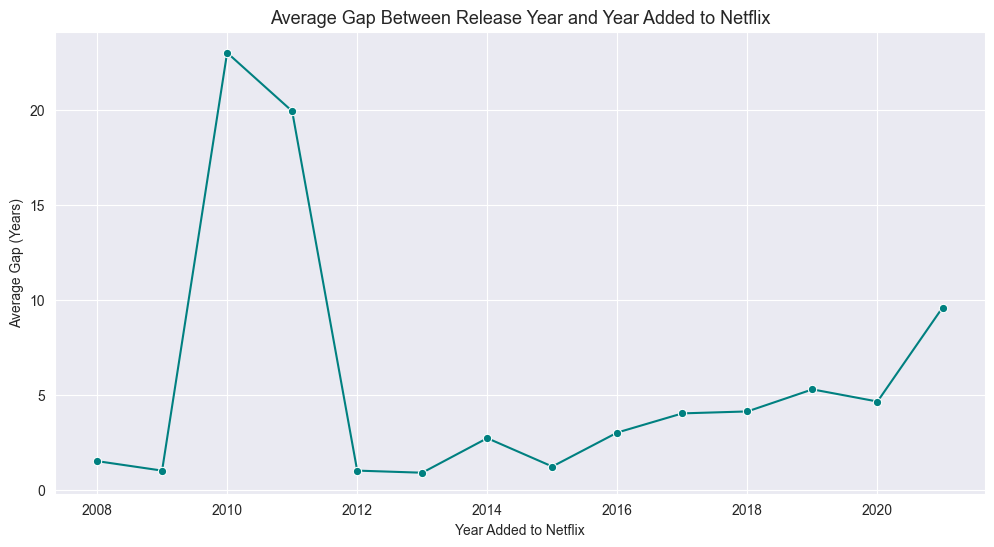

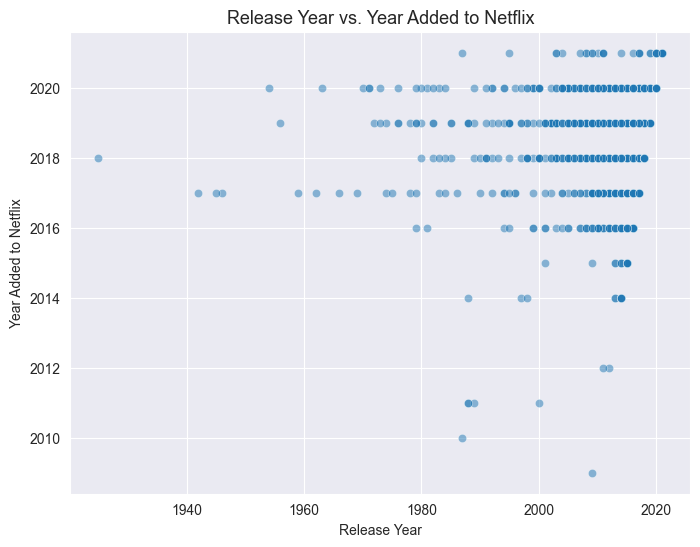

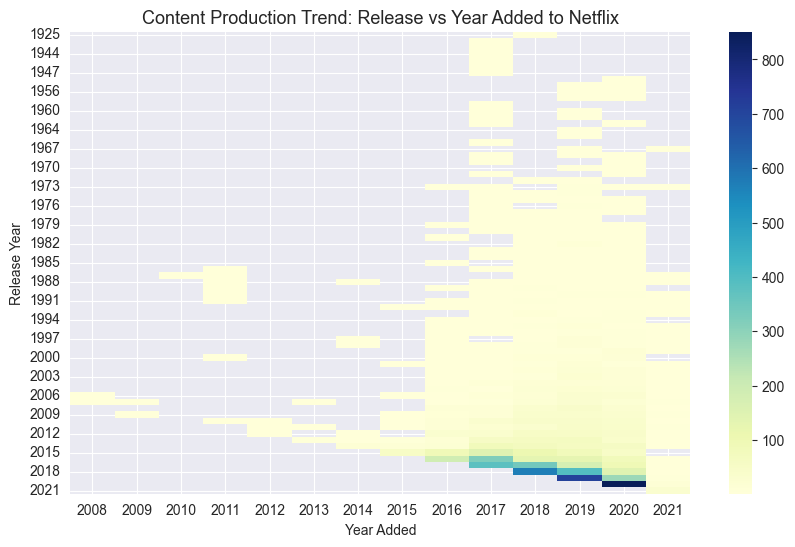

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20608\4252916916.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='gap_years', palette='Set2')


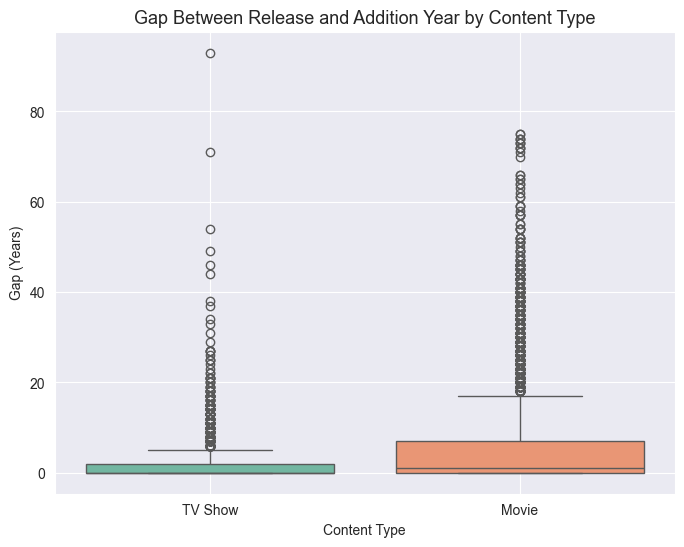

Average Gap (Years) by Type:
 type
Movie      5.56
TV Show    2.25
Name: gap_years, dtype: float64

Overall Average Gap: 4.57 years

💡 Insights to look for:
- If the average gap decreases → Netflix is adding newer content faster.
- If Movies have a higher gap → Netflix often adds older films.
- If TV Shows have a smaller gap → Most are new releases or Netflix Originals.
- In the heatmap, dark cells near the diagonal = newly released content added quickly.



In [15]:
#Can we identify any trends in content production based on the release year vs. the year added to Netflix?
# 📊 Netflix Data: Trend Analysis - Release Year vs Year Added

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/main/Datasets/netflix_titles.csv')  # Change path if needed

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop missing years or date_added
df = df.dropna(subset=['release_year', 'date_added']).copy()

# Extract year added
df['year_added'] = df['date_added'].dt.year

# Calculate gap between release and addition year
df['gap_years'] = df['year_added'] - df['release_year']

# Remove negative gaps (invalid data)
df = df[df['gap_years'] >= 0]

# 📈 Plot 1: Average gap over time
plt.figure(figsize=(12,6))
avg_gap = df.groupby('year_added')['gap_years'].mean().reset_index()
sns.lineplot(data=avg_gap, x='year_added', y='gap_years', marker='o', color='teal')
plt.title('Average Gap Between Release Year and Year Added to Netflix', fontsize=13)
plt.xlabel('Year Added to Netflix')
plt.ylabel('Average Gap (Years)')
plt.grid(True)
plt.show()

# 📉 Plot 2: Scatter plot - Release vs Added year
plt.figure(figsize=(8,6))
sample_df = df.sample(min(2000, len(df)), random_state=42)  # Sample for readability
sns.scatterplot(data=sample_df, x='release_year', y='year_added', alpha=0.5)
plt.title('Release Year vs. Year Added to Netflix', fontsize=13)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.grid(True)
plt.show()

# 🔥 Plot 3: Heatmap for density visualization
plt.figure(figsize=(10,6))
heat_df = df.pivot_table(index='release_year', columns='year_added', values='show_id', aggfunc='count')
sns.heatmap(heat_df, cmap='YlGnBu')
plt.title('Content Production Trend: Release vs Year Added to Netflix', fontsize=13)
plt.xlabel('Year Added')
plt.ylabel('Release Year')
plt.show()

# 📊 Plot 4: Boxplot for gap by type (Movies vs TV Shows)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='type', y='gap_years', palette='Set2')
plt.title('Gap Between Release and Addition Year by Content Type', fontsize=13)
plt.xlabel('Content Type')
plt.ylabel('Gap (Years)')
plt.grid(True)
plt.show()

# 🧠 Summary insights
print("Average Gap (Years) by Type:\n", df.groupby('type')['gap_years'].mean().round(2))
print("\nOverall Average Gap:", round(df['gap_years'].mean(), 2), "years")

print("""
💡 Insights to look for:
- If the average gap decreases → Netflix is adding newer content faster.
- If Movies have a higher gap → Netflix often adds older films.
- If TV Shows have a smaller gap → Most are new releases or Netflix Originals.
- In the heatmap, dark cells near the diagonal = newly released content added quickly.
""")


In [17]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.9 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/8.9 MB 1.8 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.9 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/8.9 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 2.9/8.9 MB 2.2 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.9 MB 2.2 MB/s eta 0:00:03
   ----------------- ---------------------- 3.9/8.9 MB 2.4 MB/s eta 0:00:03
   --------------------- ------------------ 4.7/8.9 MB 2.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.5/8.9 MB 2.6 MB/s eta 0:00:02
   ---------------------

In [19]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 932.9 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.5 MB/s  0:00:01

   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- -

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/main/Datasets/netflix_titles.csv')

# Fill missing descriptions with empty strings
df['description'] = df['description'].fillna('')

# Get English stopwords
stop_words = stopwords.words('english')

# Create bigram vectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)

# Fit and transform
X = vectorizer.fit_transform(df['description'])

# Sum the occurrences of each bigram
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Display top 20 bigrams
top_20_bigrams = words_freq[:20]
print(top_20_bigrams)


[('high school', 133), ('year old', 130), ('young man', 103), ('young woman', 98), ('new york', 86), ('small town', 59), ('best friend', 51), ('true story', 48), ('world war', 47), ('stand special', 47), ('best friends', 45), ('based true', 43), ('war ii', 39), ('documentary follows', 38), ('los angeles', 38), ('falls love', 37), ('around world', 36), ('york city', 35), ('documentary series', 35), ('road trip', 33)]


director
Unknown                   2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Lance Bangs                  8
Johnnie To                   8
Shannon Hartman              8
Robert Rodriguez             8
Quentin Tarantino            8
Kunle Afolayan               8
Ryan Polito                  8
Hakan Algül                  8
Justin G. Dyck               7
Fernando Ayllón              7
Name: count, dtype: int64


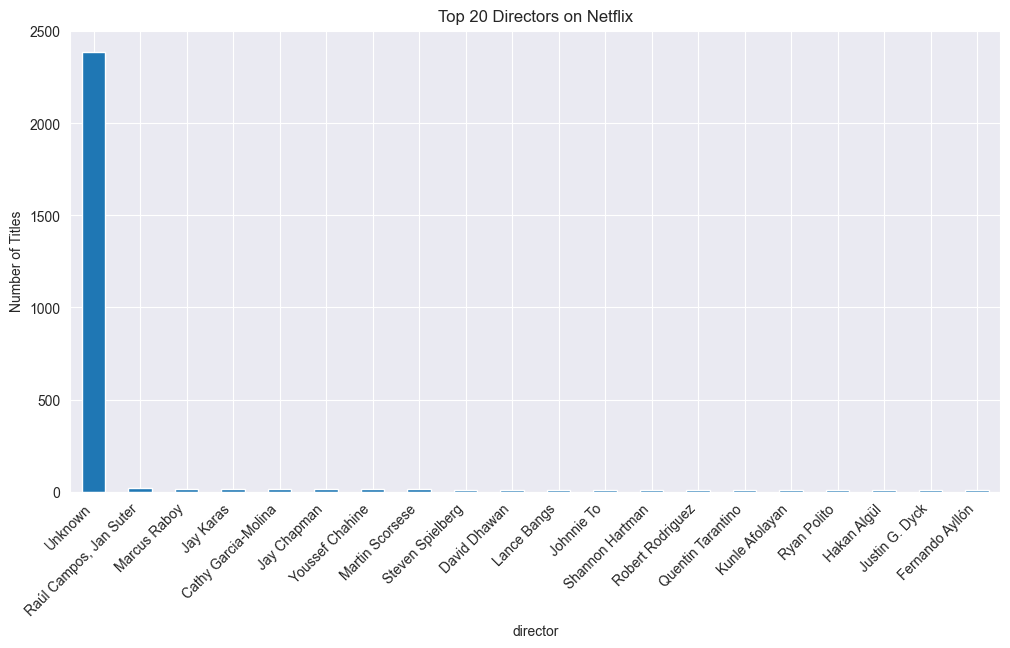

In [22]:
#Who are the top directors on Netflix?
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/main/Datasets/netflix_titles.csv')

# Fill missing directors with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

# Count titles per director
top_directors = df['director'].value_counts().head(20)  # top 20 directors

# Display
print(top_directors)

# Optional: Barplot
plt.figure(figsize=(12,6))
top_directors.plot(kind='bar')
plt.title('Top 20 Directors on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()
